## Linear regression of est. fish age to `g__Shewanella`:`o__Synechococcales` log-latio
Just for gill samples (in particular, only those gill samples already used in the visualization and with a valid log-ratio).

### Load the exported sample plot data from Qurro

In [1]:
import pandas as pd
sp = pd.read_csv("g_shew_over_o_syn_age.tsv", sep='\t', index_col=0, na_filter=False)
print("{} samples total in the visualization.".format(len(sp.index)))
sp.head()

820 samples total in the visualization.


,Current_Log_Ratio,age_2,sample_type_body_site
Sample ID,,,
11721.s38.19.gill,1.3862943611198908,1.822653664,fish gill
11721.ep25ul.1000nl.s12.5.gill,1.3426977136141325,1.772148094,fish gill
11721.SDsw.1.2018.26,null,not applicable,sea water
11721.s13.1.digesta,null,1.648286083,fish digesta
11721.s1.1.digesta,-2.7647455447787554,0.947601174,fish digesta


### Remove samples with an invalid log-ratio

In [2]:
sp_valid = sp.loc[sp["Current_Log_Ratio"] != "null"]
print("{} samples have a valid Shewanella:Synechococcales log-ratio.".format(len(sp_valid.index)))
sp_valid.head()

307 samples have a valid Shewanella:Synechococcales log-ratio.


,Current_Log_Ratio,age_2,sample_type_body_site
Sample ID,,,
11721.s38.19.gill,1.3862943611198908,1.822653664,fish gill
11721.ep25ul.1000nl.s12.5.gill,1.3426977136141325,1.772148094,fish gill
11721.s1.1.digesta,-2.7647455447787554,0.947601174,fish digesta
11721.s38.13.gill,6.555072356312942,0.864576865,fish gill
11721.s38.23.skin,2.8332133440562166,0.585382262,fish skin


### Remove samples that aren't from fish gills

In [3]:
sp_valid_gill = sp_valid.loc[sp_valid["sample_type_body_site"] == "fish gill"]
print("{} gill samples have a valid log-ratio.".format(len(sp_valid_gill.index)))
sp_valid_gill.head()

148 gill samples have a valid log-ratio.


,Current_Log_Ratio,age_2,sample_type_body_site
Sample ID,,,
11721.s38.19.gill,1.3862943611198908,1.822653664,fish gill
11721.ep25ul.1000nl.s12.5.gill,1.3426977136141325,1.772148094,fish gill
11721.s38.13.gill,6.555072356312942,0.864576865,fish gill
11721.s38.16.gill,6.540869652841447,2.304387486,fish gill
11721.echo5ul.200nl.s9.6.gill,6.877222431083537,1.772148094,fish gill


### Draw a basic scatter-plot of estimated age vs. log-ratio for just gill samples

In [4]:
# We need to manually set the age and log-ratio columns as numeric
sp_valid_gill["age_2"] = pd.to_numeric(sp_valid_gill["age_2"])
sp_valid_gill["Current_Log_Ratio"] = pd.to_numeric(sp_valid_gill["Current_Log_Ratio"])

# We use color and transparency values that match what's used in this scatterplot in Qurro
# (this color is one of the defaults in the tableau10 colorscheme --
# see https://vega.github.io/vega/docs/schemes/#tableau10)
sp_valid_gill.plot(kind="scatter", x="age_2", y="Current_Log_Ratio", c="#e45756", alpha=0.7)

/anaconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/qiime2-2019.7/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Perform ordinary-least-squares linear regression on this data
We'll use [scikit-learn](https://scikit-learn.org/stable/) to do this. This section is based on [this example](https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d) of performing linear regression in scikit-learn -- credit to Adarsh Menon.

R^2 = 0.10219254734081584


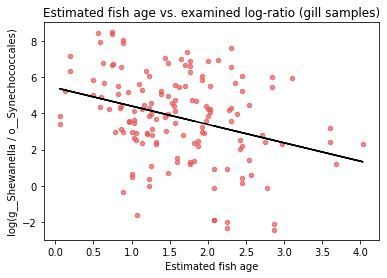

In [5]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

# Reshape the data to get into a format that LinearRegression accepts
x = sp_valid_gill["age_2"].values.reshape(-1, 1)
y = sp_valid_gill["Current_Log_Ratio"].values.reshape(-1, 1)

# Perform linear regression
lr = LinearRegression().fit(x, y)
lr_y = lr.predict(x)

# Plot the same scatterplot as before, but visualize the linear regression alongside the samples
sp_valid_gill.plot(kind="scatter", x="age_2", y="Current_Log_Ratio", c="#e45756", alpha=0.7)
pyplot.plot(x, lr_y, color="black")

# Make the titles informative
pyplot.xlabel("Estimated fish age")
pyplot.ylabel("log(g__Shewanella / o__Synechococcales)")
pyplot.title("Estimated fish age vs. examined log-ratio (gill samples)")

# Export the plot
pyplot.savefig("gill_lr.pdf", dpi=600)

# What's the R^2 value of this regression model?
print("R^2 = {}".format(lr.score(x, y)))